In [3]:
import sys
sys.path.append(".")
%cd ..

/mnt/sdb1/frasos/Bachelor2021


In [4]:
import pyforest 
from DataPrep.load_data import load_data
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [5]:
def prediction_of_change_in_direction(y_true, y_pred):
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)

    true_sub = np.subtract(y_true[0:(len(y_true) - 1)], y_true[1:(len(y_true))])
    pred_sub = np.subtract(y_pred[0:(len(y_pred) - 1)], y_pred[1:(len(y_pred))])

    mult = true_sub * pred_sub
    result = 0
    for m in mult:
        if m > 0:
            result = result + 1

    return (100 * (result / len(y_true)))

In [6]:
ar = [7,9,8,7,8,8,7,9]
d = [1,1,1,1,1,1,1,1]
ma = [8,7,9,8,9,9,8,9]
pred_index = pd.to_datetime(["2019-12-02","2019-12-03","2019-12-04","2019-12-05","2019-12-06","2019-12-07","2019-12-08"])
cuts = pd.to_datetime(['2018-10-23','2019-06-15','2018-10-13','2018-10-18','2019-04-03','2019-04-18','2019-06-15','2019-05-20'])

df = load_data()
label=5
df = df[df["Label"]==label]
b = df.index[int((len(df["Energy (kWh)"].index))*0.8)]
re = len(df["Energy (kWh)"].index)-int((len(df["Energy (kWh)"].index))*0.8)
preds = pd.DataFrame(columns=["1-day","2-day","3-day","4-day","5-day","6-day","7-day"])
with tqdm(total=re, file=sys.stdout) as pbar:
    for i in range(re):
        sam = SARIMAX(df["Energy (kWh)"][:b], order=(ar[label],d[label],ma[label]) ,freq="D")
        if i==0:
            sam_fit=sam.fit(disp = False, full_output = False)
        sam_params = sam_fit.params
        with sam.fix_params(sam_params):
            sam_fit = sam.fit(disp = False, full_output = False)
        b = b + pd.Timedelta(days=1)
        y_pred = sam_fit.forecast(steps=7)
        preds = preds.append(y_pred)

        pbar.update(1)
        #actual = df["Energy (kWh)"][int((len(df["Energy (kWh)"].index))*0.8):int((len(df["Energy (kWh)"].index))*0.8)+7]
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/616 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

  0%|          | 1/616 [00:09<1:37:19,  9.49s/it]

<IPython.core.display.Javascript object>

  0%|          | 2/616 [00:09<42:18,  4.14s/it]  

<IPython.core.display.Javascript object>

  0%|          | 3/616 [00:10<26:07,  2.56s/it]

<IPython.core.display.Javascript object>

  1%|          | 4/616 [00:11<18:23,  1.80s/it]

<IPython.core.display.Javascript object>

  1%|          | 5/616 [00:11<14:09,  1.39s/it]

<IPython.core.display.Javascript object>

  1%|          | 6/616 [00:12<11:35,  1.14s/it]

<IPython.core.display.Javascript object>

  1%|          | 7/616 [00:13<10:09,  1.00s/it]

<IPython.core.display.Javascript object>

  1%|▏         | 8/616 [00:13<09:07,  1.11it/s]

<IPython.core.display.Javascript object>

  1%|▏         | 9/616 [00:14<07:37,  1.33it/s]

<IPython.core.display.Javascript object>

  2%|▏         | 10/616 [00:14<06:25,  1.57it/s]

<IPython.core.display.Javascript object>

  2%|▏         | 11/616 [00:15<06:22,  1.58it/s]

<IPython.core.display.Javascript object>

  2%|▏         | 12/616 [00:16<06:36,  1.52it/s]

<IPython.core.display.Javascript object>

  2%|▏         | 13/616 [00:16<06:40,  1.51it/s]

<IPython.core.display.Javascript object>

  2%|▏         | 14/616 [00:17<05:46,  1.74it/s]

<IPython.core.display.Javascript object>

  2%|▏         | 15/616 [00:17<05:13,  1.92it/s]

<IPython.core.display.Javascript object>

  3%|▎         | 16/616 [00:17<04:53,  2.05it/s]

<IPython.core.display.Javascript object>

  3%|▎         | 17/616 [00:18<04:25,  2.26it/s]

<IPython.core.display.Javascript object>

  3%|▎         | 18/616 [00:18<04:19,  2.31it/s]

<IPython.core.display.Javascript object>

  3%|▎         | 19/616 [00:19<04:11,  2.37it/s]

<IPython.core.display.Javascript object>

  3%|▎         | 20/616 [00:19<04:02,  2.45it/s]

<IPython.core.display.Javascript object>

  3%|▎         | 21/616 [00:19<03:55,  2.52it/s]

<IPython.core.display.Javascript object>

  4%|▎         | 22/616 [00:20<03:57,  2.50it/s]

<IPython.core.display.Javascript object>

  4%|▎         | 23/616 [00:20<04:52,  2.03it/s]

<IPython.core.display.Javascript object>

  4%|▍         | 24/616 [00:21<04:32,  2.17it/s]

<IPython.core.display.Javascript object>

  4%|▍         | 25/616 [00:21<04:22,  2.25it/s]

<IPython.core.display.Javascript object>

  4%|▍         | 26/616 [00:22<04:13,  2.33it/s]

<IPython.core.display.Javascript object>

  4%|▍         | 27/616 [00:22<04:07,  2.38it/s]

<IPython.core.display.Javascript object>

  5%|▍         | 28/616 [00:22<04:03,  2.42it/s]

<IPython.core.display.Javascript object>

  5%|▍         | 29/616 [00:23<04:01,  2.43it/s]

<IPython.core.display.Javascript object>

  5%|▍         | 30/616 [00:23<04:35,  2.13it/s]

<IPython.core.display.Javascript object>

  5%|▌         | 31/616 [00:24<04:45,  2.05it/s]

<IPython.core.display.Javascript object>

  5%|▌         | 32/616 [00:25<05:28,  1.78it/s]

<IPython.core.display.Javascript object>

  5%|▌         | 33/616 [00:25<04:58,  1.96it/s]

<IPython.core.display.Javascript object>

  6%|▌         | 34/616 [00:26<05:30,  1.76it/s]

<IPython.core.display.Javascript object>

  6%|▌         | 35/616 [00:26<05:56,  1.63it/s]

<IPython.core.display.Javascript object>

  6%|▌         | 36/616 [00:27<05:28,  1.77it/s]

<IPython.core.display.Javascript object>

  6%|▌         | 37/616 [00:28<05:57,  1.62it/s]

<IPython.core.display.Javascript object>

  6%|▌         | 38/616 [00:28<06:13,  1.55it/s]

<IPython.core.display.Javascript object>

  6%|▋         | 39/616 [00:29<06:23,  1.51it/s]

<IPython.core.display.Javascript object>

  6%|▋         | 40/616 [00:30<06:27,  1.48it/s]

<IPython.core.display.Javascript object>

  7%|▋         | 41/616 [00:31<06:36,  1.45it/s]

<IPython.core.display.Javascript object>

  7%|▋         | 42/616 [00:31<06:46,  1.41it/s]

<IPython.core.display.Javascript object>

  7%|▋         | 43/616 [00:32<05:49,  1.64it/s]

<IPython.core.display.Javascript object>

  7%|▋         | 44/616 [00:32<05:08,  1.86it/s]

<IPython.core.display.Javascript object>

  7%|▋         | 45/616 [00:33<05:18,  1.79it/s]

<IPython.core.display.Javascript object>

  7%|▋         | 46/616 [00:33<05:40,  1.68it/s]

<IPython.core.display.Javascript object>

  8%|▊         | 47/616 [00:34<05:45,  1.65it/s]

<IPython.core.display.Javascript object>

  8%|▊         | 48/616 [00:35<05:49,  1.63it/s]

<IPython.core.display.Javascript object>

  8%|▊         | 49/616 [00:35<05:52,  1.61it/s]

<IPython.core.display.Javascript object>

  8%|▊         | 50/616 [00:36<05:04,  1.86it/s]

<IPython.core.display.Javascript object>

  8%|▊         | 51/616 [00:36<04:41,  2.01it/s]

<IPython.core.display.Javascript object>

  8%|▊         | 52/616 [00:37<05:07,  1.84it/s]

<IPython.core.display.Javascript object>

  9%|▊         | 53/616 [00:37<05:32,  1.69it/s]

<IPython.core.display.Javascript object>

  9%|▉         | 54/616 [00:38<05:52,  1.59it/s]

<IPython.core.display.Javascript object>

  9%|▉         | 55/616 [00:39<05:53,  1.59it/s]

<IPython.core.display.Javascript object>

  9%|▉         | 56/616 [00:39<05:26,  1.72it/s]

<IPython.core.display.Javascript object>

  9%|▉         | 57/616 [00:40<04:50,  1.93it/s]

<IPython.core.display.Javascript object>

  9%|▉         | 58/616 [00:40<04:48,  1.93it/s]

<IPython.core.display.Javascript object>

 10%|▉         | 59/616 [00:41<05:25,  1.71it/s]

<IPython.core.display.Javascript object>

 10%|▉         | 60/616 [00:41<05:12,  1.78it/s]

<IPython.core.display.Javascript object>

 10%|▉         | 61/616 [00:42<04:34,  2.02it/s]

<IPython.core.display.Javascript object>

 10%|█         | 62/616 [00:42<04:08,  2.23it/s]

<IPython.core.display.Javascript object>

 10%|█         | 63/616 [00:43<04:58,  1.86it/s]

<IPython.core.display.Javascript object>

 10%|█         | 64/616 [00:43<04:51,  1.90it/s]

<IPython.core.display.Javascript object>

 11%|█         | 65/616 [00:44<04:31,  2.03it/s]

<IPython.core.display.Javascript object>

 11%|█         | 66/616 [00:44<04:14,  2.16it/s]

<IPython.core.display.Javascript object>

 11%|█         | 67/616 [00:44<04:03,  2.26it/s]

<IPython.core.display.Javascript object>

 11%|█         | 68/616 [00:45<03:54,  2.34it/s]

<IPython.core.display.Javascript object>

 11%|█         | 69/616 [00:46<04:45,  1.92it/s]

<IPython.core.display.Javascript object>

 11%|█▏        | 70/616 [00:46<04:48,  1.89it/s]

<IPython.core.display.Javascript object>

 12%|█▏        | 71/616 [00:46<04:23,  2.07it/s]

<IPython.core.display.Javascript object>

 12%|█▏        | 72/616 [00:47<04:01,  2.25it/s]

<IPython.core.display.Javascript object>

 12%|█▏        | 73/616 [00:47<04:08,  2.19it/s]

<IPython.core.display.Javascript object>

 12%|█▏        | 74/616 [00:48<04:23,  2.06it/s]

<IPython.core.display.Javascript object>

 12%|█▏        | 75/616 [00:48<04:12,  2.15it/s]

<IPython.core.display.Javascript object>

 12%|█▏        | 76/616 [00:49<03:57,  2.27it/s]

<IPython.core.display.Javascript object>

 12%|█▎        | 77/616 [00:49<03:53,  2.31it/s]

<IPython.core.display.Javascript object>

 13%|█▎        | 78/616 [00:49<03:47,  2.36it/s]

<IPython.core.display.Javascript object>

 13%|█▎        | 79/616 [00:50<04:02,  2.22it/s]

<IPython.core.display.Javascript object>

 13%|█▎        | 80/616 [00:51<04:50,  1.84it/s]

<IPython.core.display.Javascript object>

 13%|█▎        | 81/616 [00:52<05:24,  1.65it/s]

<IPython.core.display.Javascript object>

 13%|█▎        | 82/616 [00:52<04:53,  1.82it/s]

<IPython.core.display.Javascript object>

 13%|█▎        | 83/616 [00:52<04:27,  1.99it/s]

<IPython.core.display.Javascript object>

 14%|█▎        | 84/616 [00:53<04:12,  2.10it/s]

<IPython.core.display.Javascript object>

 14%|█▍        | 85/616 [00:53<04:32,  1.95it/s]

<IPython.core.display.Javascript object>

 14%|█▍        | 86/616 [00:54<04:44,  1.87it/s]

<IPython.core.display.Javascript object>

 14%|█▍        | 87/616 [00:55<05:23,  1.64it/s]

<IPython.core.display.Javascript object>

 14%|█▍        | 88/616 [00:55<05:13,  1.68it/s]

<IPython.core.display.Javascript object>

 14%|█▍        | 89/616 [00:56<04:40,  1.88it/s]

<IPython.core.display.Javascript object>

 15%|█▍        | 90/616 [00:56<04:16,  2.05it/s]

<IPython.core.display.Javascript object>

 15%|█▍        | 91/616 [00:56<04:01,  2.17it/s]

<IPython.core.display.Javascript object>

 15%|█▍        | 92/616 [00:57<04:40,  1.87it/s]

<IPython.core.display.Javascript object>

 15%|█▌        | 93/616 [00:58<04:41,  1.86it/s]

<IPython.core.display.Javascript object>

 15%|█▌        | 94/616 [00:58<04:15,  2.04it/s]

<IPython.core.display.Javascript object>

 15%|█▌        | 95/616 [00:58<03:58,  2.18it/s]

<IPython.core.display.Javascript object>

 16%|█▌        | 96/616 [00:59<03:42,  2.34it/s]

<IPython.core.display.Javascript object>

 16%|█▌        | 97/616 [00:59<03:30,  2.46it/s]

<IPython.core.display.Javascript object>

 16%|█▌        | 98/616 [01:00<03:27,  2.50it/s]

<IPython.core.display.Javascript object>

 16%|█▌        | 99/616 [01:00<04:03,  2.13it/s]

<IPython.core.display.Javascript object>

 16%|█▌        | 100/616 [01:01<04:28,  1.92it/s]

<IPython.core.display.Javascript object>

 16%|█▋        | 101/616 [01:01<04:20,  1.98it/s]

<IPython.core.display.Javascript object>

 17%|█▋        | 102/616 [01:02<04:41,  1.83it/s]

<IPython.core.display.Javascript object>

 17%|█▋        | 103/616 [01:03<04:51,  1.76it/s]

<IPython.core.display.Javascript object>

 17%|█▋        | 104/616 [01:03<04:46,  1.78it/s]

<IPython.core.display.Javascript object>

 17%|█▋        | 105/616 [01:03<04:21,  1.96it/s]

<IPython.core.display.Javascript object>

 17%|█▋        | 106/616 [01:04<04:36,  1.84it/s]

<IPython.core.display.Javascript object>

 17%|█▋        | 107/616 [01:05<05:04,  1.67it/s]

<IPython.core.display.Javascript object>

 18%|█▊        | 108/616 [01:06<05:26,  1.56it/s]

<IPython.core.display.Javascript object>

 18%|█▊        | 109/616 [01:06<05:44,  1.47it/s]

<IPython.core.display.Javascript object>

 18%|█▊        | 110/616 [01:07<05:47,  1.46it/s]

<IPython.core.display.Javascript object>

 18%|█▊        | 111/616 [01:07<05:00,  1.68it/s]

<IPython.core.display.Javascript object>

 18%|█▊        | 112/616 [01:08<04:27,  1.88it/s]

<IPython.core.display.Javascript object>

 18%|█▊        | 113/616 [01:08<04:07,  2.03it/s]

<IPython.core.display.Javascript object>

 19%|█▊        | 114/616 [01:09<04:47,  1.75it/s]

<IPython.core.display.Javascript object>

 19%|█▊        | 115/616 [01:10<05:17,  1.58it/s]

<IPython.core.display.Javascript object>

 19%|█▉        | 116/616 [01:10<05:24,  1.54it/s]

<IPython.core.display.Javascript object>

 19%|█▉        | 117/616 [01:11<05:31,  1.51it/s]

<IPython.core.display.Javascript object>

 19%|█▉        | 118/616 [01:12<05:41,  1.46it/s]

<IPython.core.display.Javascript object>

 19%|█▉        | 119/616 [01:13<05:49,  1.42it/s]

<IPython.core.display.Javascript object>

 19%|█▉        | 120/616 [01:13<05:56,  1.39it/s]

<IPython.core.display.Javascript object>

 20%|█▉        | 121/616 [01:14<05:54,  1.39it/s]

<IPython.core.display.Javascript object>

 20%|█▉        | 122/616 [01:15<05:48,  1.42it/s]

<IPython.core.display.Javascript object>

 20%|█▉        | 123/616 [01:15<05:52,  1.40it/s]

<IPython.core.display.Javascript object>

 20%|██        | 124/616 [01:16<05:03,  1.62it/s]

<IPython.core.display.Javascript object>

 20%|██        | 125/616 [01:16<04:34,  1.79it/s]

<IPython.core.display.Javascript object>

 20%|██        | 126/616 [01:17<04:06,  1.99it/s]

<IPython.core.display.Javascript object>

 21%|██        | 127/616 [01:17<03:48,  2.14it/s]

<IPython.core.display.Javascript object>

 21%|██        | 128/616 [01:17<03:40,  2.22it/s]

<IPython.core.display.Javascript object>

 21%|██        | 129/616 [01:18<03:33,  2.28it/s]

<IPython.core.display.Javascript object>

 21%|██        | 130/616 [01:18<03:32,  2.29it/s]

<IPython.core.display.Javascript object>

 21%|██▏       | 131/616 [01:19<03:31,  2.29it/s]

<IPython.core.display.Javascript object>

 21%|██▏       | 132/616 [01:19<03:21,  2.40it/s]

<IPython.core.display.Javascript object>

 22%|██▏       | 133/616 [01:19<03:15,  2.47it/s]

<IPython.core.display.Javascript object>

 22%|██▏       | 134/616 [01:20<03:28,  2.31it/s]

<IPython.core.display.Javascript object>

 22%|██▏       | 135/616 [01:21<04:14,  1.89it/s]

<IPython.core.display.Javascript object>

 22%|██▏       | 136/616 [01:21<04:43,  1.69it/s]

<IPython.core.display.Javascript object>

 22%|██▏       | 137/616 [01:22<04:19,  1.85it/s]

<IPython.core.display.Javascript object>

 22%|██▏       | 138/616 [01:22<03:58,  2.00it/s]

<IPython.core.display.Javascript object>

 23%|██▎       | 139/616 [01:23<03:44,  2.12it/s]

<IPython.core.display.Javascript object>

 23%|██▎       | 140/616 [01:23<04:19,  1.84it/s]

<IPython.core.display.Javascript object>

 23%|██▎       | 141/616 [01:24<04:38,  1.71it/s]

<IPython.core.display.Javascript object>

 23%|██▎       | 142/616 [01:25<04:08,  1.90it/s]

<IPython.core.display.Javascript object>

 23%|██▎       | 143/616 [01:25<04:37,  1.71it/s]

<IPython.core.display.Javascript object>

 23%|██▎       | 144/616 [01:26<04:55,  1.60it/s]

<IPython.core.display.Javascript object>

 24%|██▎       | 145/616 [01:27<04:59,  1.57it/s]

<IPython.core.display.Javascript object>

 24%|██▎       | 146/616 [01:27<04:51,  1.61it/s]

<IPython.core.display.Javascript object>

 24%|██▍       | 147/616 [01:28<04:17,  1.82it/s]

<IPython.core.display.Javascript object>

 24%|██▍       | 148/616 [01:28<04:33,  1.71it/s]

<IPython.core.display.Javascript object>

 24%|██▍       | 149/616 [01:29<04:55,  1.58it/s]

<IPython.core.display.Javascript object>

 24%|██▍       | 150/616 [01:29<04:19,  1.80it/s]

<IPython.core.display.Javascript object>

 25%|██▍       | 151/616 [01:30<04:03,  1.91it/s]

<IPython.core.display.Javascript object>

 25%|██▍       | 152/616 [01:31<04:27,  1.74it/s]

<IPython.core.display.Javascript object>

 25%|██▍       | 153/616 [01:31<04:01,  1.92it/s]

<IPython.core.display.Javascript object>

 25%|██▌       | 154/616 [01:31<03:46,  2.04it/s]

<IPython.core.display.Javascript object>

 25%|██▌       | 155/616 [01:32<03:39,  2.10it/s]

<IPython.core.display.Javascript object>

 25%|██▌       | 156/616 [01:32<03:29,  2.19it/s]

<IPython.core.display.Javascript object>

 25%|██▌       | 157/616 [01:33<03:14,  2.36it/s]

<IPython.core.display.Javascript object>

 26%|██▌       | 158/616 [01:33<03:09,  2.41it/s]

<IPython.core.display.Javascript object>

 26%|██▌       | 159/616 [01:33<03:03,  2.49it/s]

<IPython.core.display.Javascript object>

 26%|██▌       | 160/616 [01:34<03:11,  2.38it/s]

<IPython.core.display.Javascript object>

 26%|██▌       | 161/616 [01:34<03:37,  2.09it/s]

<IPython.core.display.Javascript object>

 26%|██▋       | 162/616 [01:35<03:24,  2.22it/s]

<IPython.core.display.Javascript object>

 26%|██▋       | 163/616 [01:35<03:58,  1.90it/s]

<IPython.core.display.Javascript object>

 27%|██▋       | 164/616 [01:36<04:28,  1.68it/s]

<IPython.core.display.Javascript object>

 27%|██▋       | 165/616 [01:37<04:12,  1.79it/s]

<IPython.core.display.Javascript object>

 27%|██▋       | 166/616 [01:37<03:45,  2.00it/s]

<IPython.core.display.Javascript object>

 27%|██▋       | 167/616 [01:38<04:04,  1.84it/s]

<IPython.core.display.Javascript object>

 27%|██▋       | 168/616 [01:38<04:31,  1.65it/s]

<IPython.core.display.Javascript object>

 27%|██▋       | 169/616 [01:39<04:52,  1.53it/s]

<IPython.core.display.Javascript object>

 28%|██▊       | 170/616 [01:40<05:01,  1.48it/s]

<IPython.core.display.Javascript object>

 28%|██▊       | 171/616 [01:41<05:03,  1.47it/s]

<IPython.core.display.Javascript object>

 28%|██▊       | 172/616 [01:41<04:28,  1.65it/s]

<IPython.core.display.Javascript object>

 28%|██▊       | 173/616 [01:42<04:15,  1.73it/s]

<IPython.core.display.Javascript object>

 28%|██▊       | 174/616 [01:42<03:55,  1.88it/s]

<IPython.core.display.Javascript object>

 28%|██▊       | 175/616 [01:43<04:23,  1.67it/s]

<IPython.core.display.Javascript object>

 29%|██▊       | 176/616 [01:43<04:34,  1.61it/s]

<IPython.core.display.Javascript object>

 29%|██▊       | 177/616 [01:44<04:02,  1.81it/s]

<IPython.core.display.Javascript object>

 29%|██▉       | 178/616 [01:44<03:56,  1.85it/s]

<IPython.core.display.Javascript object>

 29%|██▉       | 179/616 [01:45<03:42,  1.97it/s]

<IPython.core.display.Javascript object>

 29%|██▉       | 180/616 [01:45<03:31,  2.06it/s]

<IPython.core.display.Javascript object>

 29%|██▉       | 181/616 [01:46<04:02,  1.79it/s]

<IPython.core.display.Javascript object>

 30%|██▉       | 182/616 [01:47<04:23,  1.65it/s]

<IPython.core.display.Javascript object>

 30%|██▉       | 183/616 [01:47<04:37,  1.56it/s]

<IPython.core.display.Javascript object>

 30%|██▉       | 184/616 [01:48<04:03,  1.77it/s]

<IPython.core.display.Javascript object>

 30%|███       | 185/616 [01:48<03:40,  1.95it/s]

<IPython.core.display.Javascript object>

 30%|███       | 186/616 [01:49<03:23,  2.11it/s]

<IPython.core.display.Javascript object>

 30%|███       | 187/616 [01:49<03:07,  2.29it/s]

<IPython.core.display.Javascript object>

 31%|███       | 188/616 [01:49<03:30,  2.03it/s]

<IPython.core.display.Javascript object>

 31%|███       | 189/616 [01:50<04:06,  1.73it/s]

<IPython.core.display.Javascript object>

 31%|███       | 190/616 [01:51<03:44,  1.90it/s]

<IPython.core.display.Javascript object>

 31%|███       | 191/616 [01:51<04:00,  1.77it/s]

<IPython.core.display.Javascript object>

 31%|███       | 192/616 [01:52<04:18,  1.64it/s]

<IPython.core.display.Javascript object>

 31%|███▏      | 193/616 [01:53<04:23,  1.61it/s]

<IPython.core.display.Javascript object>

 31%|███▏      | 194/616 [01:53<04:34,  1.54it/s]

<IPython.core.display.Javascript object>

 32%|███▏      | 195/616 [01:54<04:33,  1.54it/s]

<IPython.core.display.Javascript object>

 32%|███▏      | 196/616 [01:55<04:44,  1.48it/s]

<IPython.core.display.Javascript object>

 32%|███▏      | 197/616 [01:56<04:54,  1.42it/s]

<IPython.core.display.Javascript object>

 32%|███▏      | 198/616 [01:56<04:58,  1.40it/s]

<IPython.core.display.Javascript object>

 32%|███▏      | 199/616 [01:57<04:55,  1.41it/s]

<IPython.core.display.Javascript object>

 32%|███▏      | 200/616 [01:58<04:39,  1.49it/s]

<IPython.core.display.Javascript object>

 33%|███▎      | 201/616 [01:58<04:48,  1.44it/s]

<IPython.core.display.Javascript object>

 33%|███▎      | 202/616 [01:59<04:08,  1.66it/s]

<IPython.core.display.Javascript object>

 33%|███▎      | 203/616 [01:59<03:42,  1.86it/s]

<IPython.core.display.Javascript object>

 33%|███▎      | 204/616 [02:00<03:23,  2.02it/s]

<IPython.core.display.Javascript object>

 33%|███▎      | 205/616 [02:00<03:10,  2.16it/s]

<IPython.core.display.Javascript object>

 33%|███▎      | 206/616 [02:00<03:03,  2.23it/s]

<IPython.core.display.Javascript object>

 34%|███▎      | 207/616 [02:01<03:39,  1.86it/s]

<IPython.core.display.Javascript object>

 34%|███▍      | 208/616 [02:02<04:03,  1.67it/s]

<IPython.core.display.Javascript object>

 34%|███▍      | 209/616 [02:03<04:17,  1.58it/s]

<IPython.core.display.Javascript object>

 34%|███▍      | 210/616 [02:03<04:29,  1.51it/s]

<IPython.core.display.Javascript object>

 34%|███▍      | 211/616 [02:04<04:39,  1.45it/s]

<IPython.core.display.Javascript object>

 34%|███▍      | 212/616 [02:05<04:45,  1.42it/s]

<IPython.core.display.Javascript object>

 35%|███▍      | 213/616 [02:05<04:16,  1.57it/s]

<IPython.core.display.Javascript object>

 35%|███▍      | 214/616 [02:06<03:50,  1.74it/s]

<IPython.core.display.Javascript object>

 35%|███▍      | 215/616 [02:06<03:28,  1.92it/s]

<IPython.core.display.Javascript object>

 35%|███▌      | 216/616 [02:06<03:15,  2.05it/s]

<IPython.core.display.Javascript object>

 35%|███▌      | 217/616 [02:07<03:04,  2.16it/s]

<IPython.core.display.Javascript object>

 35%|███▌      | 218/616 [02:07<03:14,  2.05it/s]

<IPython.core.display.Javascript object>

 36%|███▌      | 219/616 [02:08<03:11,  2.07it/s]

<IPython.core.display.Javascript object>

 36%|███▌      | 220/616 [02:08<03:01,  2.18it/s]

<IPython.core.display.Javascript object>

 36%|███▌      | 221/616 [02:09<02:53,  2.28it/s]

<IPython.core.display.Javascript object>

 36%|███▌      | 222/616 [02:09<02:47,  2.35it/s]

<IPython.core.display.Javascript object>

 36%|███▌      | 223/616 [02:09<02:45,  2.37it/s]

<IPython.core.display.Javascript object>

 36%|███▋      | 224/616 [02:10<02:41,  2.42it/s]

<IPython.core.display.Javascript object>

 37%|███▋      | 225/616 [02:10<02:39,  2.45it/s]

<IPython.core.display.Javascript object>

 37%|███▋      | 226/616 [02:11<03:07,  2.07it/s]

<IPython.core.display.Javascript object>

 37%|███▋      | 227/616 [02:12<03:27,  1.88it/s]

<IPython.core.display.Javascript object>

 37%|███▋      | 228/616 [02:12<03:57,  1.63it/s]

<IPython.core.display.Javascript object>

 37%|███▋      | 229/616 [02:13<04:12,  1.53it/s]

<IPython.core.display.Javascript object>

 37%|███▋      | 230/616 [02:14<04:11,  1.53it/s]

<IPython.core.display.Javascript object>

 38%|███▊      | 231/616 [02:14<03:41,  1.74it/s]

<IPython.core.display.Javascript object>

 38%|███▊      | 232/616 [02:15<03:20,  1.92it/s]

<IPython.core.display.Javascript object>

 38%|███▊      | 233/616 [02:15<03:16,  1.95it/s]

<IPython.core.display.Javascript object>

 38%|███▊      | 234/616 [02:15<03:03,  2.09it/s]

<IPython.core.display.Javascript object>

 38%|███▊      | 235/616 [02:16<02:53,  2.20it/s]

<IPython.core.display.Javascript object>

 38%|███▊      | 236/616 [02:16<02:54,  2.18it/s]

<IPython.core.display.Javascript object>

 38%|███▊      | 237/616 [02:17<02:43,  2.32it/s]

<IPython.core.display.Javascript object>

 39%|███▊      | 238/616 [02:17<02:57,  2.12it/s]

<IPython.core.display.Javascript object>

 39%|███▉      | 239/616 [02:18<02:48,  2.24it/s]

<IPython.core.display.Javascript object>

 39%|███▉      | 240/616 [02:18<02:41,  2.33it/s]

<IPython.core.display.Javascript object>

 39%|███▉      | 241/616 [02:18<02:39,  2.35it/s]

<IPython.core.display.Javascript object>

 39%|███▉      | 242/616 [02:19<02:42,  2.30it/s]

<IPython.core.display.Javascript object>

 39%|███▉      | 243/616 [02:19<02:59,  2.07it/s]

<IPython.core.display.Javascript object>

 40%|███▉      | 244/616 [02:20<02:48,  2.21it/s]

<IPython.core.display.Javascript object>

 40%|███▉      | 245/616 [02:20<02:39,  2.33it/s]

<IPython.core.display.Javascript object>

 40%|███▉      | 246/616 [02:21<02:47,  2.20it/s]

<IPython.core.display.Javascript object>

 40%|████      | 247/616 [02:22<03:20,  1.84it/s]

<IPython.core.display.Javascript object>

 40%|████      | 248/616 [02:22<03:05,  1.98it/s]

<IPython.core.display.Javascript object>

 40%|████      | 249/616 [02:22<02:53,  2.12it/s]

<IPython.core.display.Javascript object>

 41%|████      | 250/616 [02:23<03:23,  1.79it/s]

<IPython.core.display.Javascript object>

 41%|████      | 251/616 [02:24<03:43,  1.63it/s]

<IPython.core.display.Javascript object>

 41%|████      | 252/616 [02:25<03:56,  1.54it/s]

<IPython.core.display.Javascript object>

 41%|████      | 253/616 [02:25<03:36,  1.68it/s]

<IPython.core.display.Javascript object>

 41%|████      | 254/616 [02:26<03:54,  1.54it/s]

<IPython.core.display.Javascript object>

 41%|████▏     | 255/616 [02:27<04:04,  1.48it/s]

<IPython.core.display.Javascript object>

 42%|████▏     | 256/616 [02:27<03:37,  1.65it/s]

<IPython.core.display.Javascript object>

 42%|████▏     | 257/616 [02:27<03:27,  1.73it/s]

<IPython.core.display.Javascript object>

 42%|████▏     | 258/616 [02:28<03:37,  1.65it/s]

<IPython.core.display.Javascript object>

 42%|████▏     | 259/616 [02:29<03:55,  1.52it/s]

<IPython.core.display.Javascript object>

 42%|████▏     | 260/616 [02:30<04:09,  1.42it/s]

<IPython.core.display.Javascript object>

 42%|████▏     | 261/616 [02:30<03:58,  1.49it/s]

<IPython.core.display.Javascript object>

 43%|████▎     | 262/616 [02:31<03:52,  1.52it/s]

<IPython.core.display.Javascript object>

 43%|████▎     | 263/616 [02:32<03:48,  1.55it/s]

<IPython.core.display.Javascript object>

 43%|████▎     | 264/616 [02:32<03:45,  1.56it/s]

<IPython.core.display.Javascript object>

 43%|████▎     | 265/616 [02:33<03:54,  1.50it/s]

<IPython.core.display.Javascript object>

 43%|████▎     | 266/616 [02:34<04:04,  1.43it/s]

<IPython.core.display.Javascript object>

 43%|████▎     | 267/616 [02:35<04:12,  1.38it/s]

<IPython.core.display.Javascript object>

 44%|████▎     | 268/616 [02:35<04:13,  1.37it/s]

<IPython.core.display.Javascript object>

 44%|████▎     | 269/616 [02:36<04:06,  1.41it/s]

<IPython.core.display.Javascript object>

 44%|████▍     | 270/616 [02:37<04:10,  1.38it/s]

<IPython.core.display.Javascript object>

 44%|████▍     | 271/616 [02:37<04:14,  1.36it/s]

<IPython.core.display.Javascript object>

 44%|████▍     | 272/616 [02:38<04:02,  1.42it/s]

<IPython.core.display.Javascript object>

 44%|████▍     | 273/616 [02:39<03:56,  1.45it/s]

<IPython.core.display.Javascript object>

 44%|████▍     | 274/616 [02:39<03:48,  1.49it/s]

<IPython.core.display.Javascript object>

 45%|████▍     | 275/616 [02:40<03:57,  1.43it/s]

<IPython.core.display.Javascript object>

 45%|████▍     | 276/616 [02:41<04:01,  1.41it/s]

<IPython.core.display.Javascript object>

 45%|████▍     | 277/616 [02:41<03:53,  1.45it/s]

<IPython.core.display.Javascript object>

 45%|████▌     | 278/616 [02:42<03:53,  1.45it/s]

<IPython.core.display.Javascript object>

 45%|████▌     | 279/616 [02:43<03:56,  1.42it/s]

<IPython.core.display.Javascript object>

 45%|████▌     | 280/616 [02:43<03:25,  1.64it/s]

<IPython.core.display.Javascript object>

 46%|████▌     | 281/616 [02:44<03:02,  1.84it/s]

<IPython.core.display.Javascript object>

 46%|████▌     | 282/616 [02:44<03:22,  1.65it/s]

<IPython.core.display.Javascript object>

 46%|████▌     | 283/616 [02:45<03:31,  1.58it/s]

<IPython.core.display.Javascript object>

 46%|████▌     | 284/616 [02:46<03:20,  1.66it/s]

<IPython.core.display.Javascript object>

 46%|████▋     | 285/616 [02:46<03:00,  1.84it/s]

<IPython.core.display.Javascript object>

 46%|████▋     | 286/616 [02:47<03:15,  1.69it/s]

<IPython.core.display.Javascript object>

 47%|████▋     | 287/616 [02:47<02:56,  1.87it/s]

<IPython.core.display.Javascript object>

 47%|████▋     | 288/616 [02:48<02:42,  2.02it/s]

<IPython.core.display.Javascript object>

 47%|████▋     | 289/616 [02:48<02:31,  2.16it/s]

<IPython.core.display.Javascript object>

 47%|████▋     | 290/616 [02:48<02:23,  2.27it/s]

<IPython.core.display.Javascript object>

 47%|████▋     | 291/616 [02:49<02:18,  2.34it/s]

<IPython.core.display.Javascript object>

 47%|████▋     | 292/616 [02:49<02:15,  2.40it/s]

<IPython.core.display.Javascript object>

 48%|████▊     | 293/616 [02:50<02:12,  2.44it/s]

<IPython.core.display.Javascript object>

 48%|████▊     | 294/616 [02:50<02:08,  2.50it/s]

<IPython.core.display.Javascript object>

 48%|████▊     | 295/616 [02:50<02:08,  2.49it/s]

<IPython.core.display.Javascript object>

 48%|████▊     | 296/616 [02:51<02:08,  2.49it/s]

<IPython.core.display.Javascript object>

 48%|████▊     | 297/616 [02:51<02:05,  2.53it/s]

<IPython.core.display.Javascript object>

 48%|████▊     | 298/616 [02:52<02:38,  2.01it/s]

<IPython.core.display.Javascript object>

 49%|████▊     | 299/616 [02:53<02:56,  1.80it/s]

<IPython.core.display.Javascript object>

 49%|████▊     | 300/616 [02:53<02:44,  1.92it/s]

<IPython.core.display.Javascript object>

 49%|████▉     | 301/616 [02:53<02:36,  2.02it/s]

<IPython.core.display.Javascript object>

 49%|████▉     | 302/616 [02:54<02:28,  2.12it/s]

<IPython.core.display.Javascript object>

 49%|████▉     | 303/616 [02:54<02:22,  2.20it/s]

<IPython.core.display.Javascript object>

 49%|████▉     | 304/616 [02:55<02:52,  1.80it/s]

<IPython.core.display.Javascript object>

 50%|████▉     | 305/616 [02:56<03:10,  1.63it/s]

<IPython.core.display.Javascript object>

 50%|████▉     | 306/616 [02:56<02:59,  1.72it/s]

<IPython.core.display.Javascript object>

 50%|████▉     | 307/616 [02:57<02:42,  1.90it/s]

<IPython.core.display.Javascript object>

 50%|█████     | 308/616 [02:57<02:33,  2.01it/s]

<IPython.core.display.Javascript object>

 50%|█████     | 309/616 [02:58<02:50,  1.80it/s]

<IPython.core.display.Javascript object>

 50%|█████     | 310/616 [02:59<03:07,  1.63it/s]

<IPython.core.display.Javascript object>

 50%|█████     | 311/616 [02:59<03:04,  1.65it/s]

<IPython.core.display.Javascript object>

 51%|█████     | 312/616 [03:00<02:42,  1.87it/s]

<IPython.core.display.Javascript object>

 51%|█████     | 313/616 [03:00<02:30,  2.02it/s]

<IPython.core.display.Javascript object>

 51%|█████     | 314/616 [03:01<02:54,  1.73it/s]

<IPython.core.display.Javascript object>

 51%|█████     | 315/616 [03:01<03:04,  1.63it/s]

<IPython.core.display.Javascript object>

 51%|█████▏    | 316/616 [03:02<03:10,  1.57it/s]

<IPython.core.display.Javascript object>

 51%|█████▏    | 317/616 [03:02<02:48,  1.77it/s]

<IPython.core.display.Javascript object>

 52%|█████▏    | 318/616 [03:03<03:02,  1.63it/s]

<IPython.core.display.Javascript object>

 52%|█████▏    | 319/616 [03:04<03:04,  1.61it/s]

<IPython.core.display.Javascript object>

 52%|█████▏    | 320/616 [03:05<03:15,  1.52it/s]

<IPython.core.display.Javascript object>

 52%|█████▏    | 321/616 [03:05<03:07,  1.57it/s]

<IPython.core.display.Javascript object>

 52%|█████▏    | 322/616 [03:06<03:11,  1.54it/s]

<IPython.core.display.Javascript object>

 52%|█████▏    | 323/616 [03:07<03:12,  1.52it/s]

<IPython.core.display.Javascript object>

 53%|█████▎    | 324/616 [03:07<02:54,  1.67it/s]

<IPython.core.display.Javascript object>

 53%|█████▎    | 325/616 [03:07<02:38,  1.83it/s]

<IPython.core.display.Javascript object>

 53%|█████▎    | 326/616 [03:08<02:40,  1.81it/s]

<IPython.core.display.Javascript object>

 53%|█████▎    | 327/616 [03:09<03:00,  1.60it/s]

<IPython.core.display.Javascript object>

 53%|█████▎    | 328/616 [03:09<03:08,  1.53it/s]

<IPython.core.display.Javascript object>

 53%|█████▎    | 329/616 [03:10<02:42,  1.77it/s]

<IPython.core.display.Javascript object>

 54%|█████▎    | 330/616 [03:10<02:27,  1.93it/s]

<IPython.core.display.Javascript object>

 54%|█████▎    | 331/616 [03:11<02:14,  2.12it/s]

<IPython.core.display.Javascript object>

 54%|█████▍    | 332/616 [03:11<02:07,  2.23it/s]

<IPython.core.display.Javascript object>

 54%|█████▍    | 333/616 [03:11<02:03,  2.29it/s]

<IPython.core.display.Javascript object>

 54%|█████▍    | 334/616 [03:12<02:15,  2.08it/s]

<IPython.core.display.Javascript object>

 54%|█████▍    | 335/616 [03:13<02:30,  1.86it/s]

<IPython.core.display.Javascript object>

 55%|█████▍    | 336/616 [03:13<02:32,  1.84it/s]

<IPython.core.display.Javascript object>

 55%|█████▍    | 337/616 [03:14<02:20,  1.99it/s]

<IPython.core.display.Javascript object>

 55%|█████▍    | 338/616 [03:14<02:41,  1.72it/s]

<IPython.core.display.Javascript object>

 55%|█████▌    | 339/616 [03:15<02:55,  1.58it/s]

<IPython.core.display.Javascript object>

 55%|█████▌    | 340/616 [03:16<02:59,  1.54it/s]

<IPython.core.display.Javascript object>

 55%|█████▌    | 341/616 [03:17<03:01,  1.52it/s]

<IPython.core.display.Javascript object>

 56%|█████▌    | 342/616 [03:17<02:38,  1.72it/s]

<IPython.core.display.Javascript object>

 56%|█████▌    | 343/616 [03:17<02:22,  1.92it/s]

<IPython.core.display.Javascript object>

 56%|█████▌    | 344/616 [03:18<02:26,  1.86it/s]

<IPython.core.display.Javascript object>

 56%|█████▌    | 345/616 [03:18<02:13,  2.04it/s]

<IPython.core.display.Javascript object>

 56%|█████▌    | 346/616 [03:19<02:05,  2.15it/s]

<IPython.core.display.Javascript object>

 56%|█████▋    | 347/616 [03:19<02:17,  1.96it/s]

<IPython.core.display.Javascript object>

 56%|█████▋    | 348/616 [03:20<02:11,  2.04it/s]

<IPython.core.display.Javascript object>

 57%|█████▋    | 349/616 [03:20<02:07,  2.10it/s]

<IPython.core.display.Javascript object>

 57%|█████▋    | 350/616 [03:21<02:12,  2.00it/s]

<IPython.core.display.Javascript object>

 57%|█████▋    | 351/616 [03:21<02:12,  2.00it/s]

<IPython.core.display.Javascript object>

 57%|█████▋    | 352/616 [03:22<02:29,  1.76it/s]

<IPython.core.display.Javascript object>

 57%|█████▋    | 353/616 [03:23<02:43,  1.61it/s]

<IPython.core.display.Javascript object>

 57%|█████▋    | 354/616 [03:23<02:55,  1.49it/s]

<IPython.core.display.Javascript object>

 58%|█████▊    | 355/616 [03:24<03:02,  1.43it/s]

<IPython.core.display.Javascript object>

 58%|█████▊    | 356/616 [03:25<03:07,  1.39it/s]

<IPython.core.display.Javascript object>

 58%|█████▊    | 357/616 [03:26<03:11,  1.35it/s]

<IPython.core.display.Javascript object>

 58%|█████▊    | 358/616 [03:26<03:02,  1.42it/s]

<IPython.core.display.Javascript object>

 58%|█████▊    | 359/616 [03:27<02:42,  1.58it/s]

<IPython.core.display.Javascript object>

 58%|█████▊    | 360/616 [03:28<02:54,  1.47it/s]

<IPython.core.display.Javascript object>

 59%|█████▊    | 361/616 [03:28<02:55,  1.46it/s]

<IPython.core.display.Javascript object>

 59%|█████▉    | 362/616 [03:29<03:00,  1.41it/s]

<IPython.core.display.Javascript object>

 59%|█████▉    | 363/616 [03:30<02:37,  1.61it/s]

<IPython.core.display.Javascript object>

 59%|█████▉    | 364/616 [03:30<02:17,  1.83it/s]

<IPython.core.display.Javascript object>

 59%|█████▉    | 365/616 [03:30<02:02,  2.05it/s]

<IPython.core.display.Javascript object>

 59%|█████▉    | 366/616 [03:31<01:54,  2.19it/s]

<IPython.core.display.Javascript object>

 60%|█████▉    | 367/616 [03:31<01:49,  2.28it/s]

<IPython.core.display.Javascript object>

 60%|█████▉    | 368/616 [03:31<01:45,  2.35it/s]

<IPython.core.display.Javascript object>

 60%|█████▉    | 369/616 [03:32<01:40,  2.46it/s]

<IPython.core.display.Javascript object>

 60%|██████    | 370/616 [03:32<01:37,  2.52it/s]

<IPython.core.display.Javascript object>

 60%|██████    | 371/616 [03:33<01:40,  2.43it/s]

<IPython.core.display.Javascript object>

 60%|██████    | 372/616 [03:33<01:39,  2.44it/s]

<IPython.core.display.Javascript object>

 61%|██████    | 373/616 [03:33<01:40,  2.42it/s]

<IPython.core.display.Javascript object>

 61%|██████    | 374/616 [03:34<01:40,  2.40it/s]

<IPython.core.display.Javascript object>

 61%|██████    | 375/616 [03:34<01:42,  2.34it/s]

<IPython.core.display.Javascript object>

 61%|██████    | 376/616 [03:35<01:41,  2.36it/s]

<IPython.core.display.Javascript object>

 61%|██████    | 377/616 [03:35<01:39,  2.40it/s]

<IPython.core.display.Javascript object>

 61%|██████▏   | 378/616 [03:36<01:37,  2.43it/s]

<IPython.core.display.Javascript object>

 62%|██████▏   | 379/616 [03:36<01:36,  2.45it/s]

<IPython.core.display.Javascript object>

 62%|██████▏   | 380/616 [03:36<01:33,  2.53it/s]

<IPython.core.display.Javascript object>

 62%|██████▏   | 381/616 [03:37<01:30,  2.60it/s]

<IPython.core.display.Javascript object>

 62%|██████▏   | 382/616 [03:37<01:33,  2.49it/s]

<IPython.core.display.Javascript object>

 62%|██████▏   | 383/616 [03:38<01:58,  1.96it/s]

<IPython.core.display.Javascript object>

 62%|██████▏   | 384/616 [03:38<01:49,  2.11it/s]

<IPython.core.display.Javascript object>

 62%|██████▎   | 385/616 [03:39<01:44,  2.21it/s]

<IPython.core.display.Javascript object>

 63%|██████▎   | 386/616 [03:39<02:07,  1.81it/s]

<IPython.core.display.Javascript object>

 63%|██████▎   | 387/616 [03:40<01:57,  1.95it/s]

<IPython.core.display.Javascript object>

 63%|██████▎   | 388/616 [03:40<01:51,  2.05it/s]

<IPython.core.display.Javascript object>

 63%|██████▎   | 389/616 [03:41<02:10,  1.74it/s]

<IPython.core.display.Javascript object>

 63%|██████▎   | 390/616 [03:42<02:23,  1.57it/s]

<IPython.core.display.Javascript object>

 63%|██████▎   | 391/616 [03:43<02:23,  1.56it/s]

<IPython.core.display.Javascript object>

 64%|██████▎   | 392/616 [03:43<02:27,  1.52it/s]

<IPython.core.display.Javascript object>

 64%|██████▍   | 393/616 [03:44<02:30,  1.48it/s]

<IPython.core.display.Javascript object>

 64%|██████▍   | 394/616 [03:45<02:30,  1.47it/s]

<IPython.core.display.Javascript object>

 64%|██████▍   | 395/616 [03:45<02:31,  1.46it/s]

<IPython.core.display.Javascript object>

 64%|██████▍   | 396/616 [03:46<02:31,  1.45it/s]

<IPython.core.display.Javascript object>

 64%|██████▍   | 397/616 [03:47<02:32,  1.44it/s]

<IPython.core.display.Javascript object>

 65%|██████▍   | 398/616 [03:47<02:32,  1.43it/s]

<IPython.core.display.Javascript object>

 65%|██████▍   | 399/616 [03:48<02:32,  1.42it/s]

<IPython.core.display.Javascript object>

 65%|██████▍   | 400/616 [03:49<02:32,  1.42it/s]

<IPython.core.display.Javascript object>

 65%|██████▌   | 401/616 [03:50<02:31,  1.42it/s]

<IPython.core.display.Javascript object>

 65%|██████▌   | 402/616 [03:50<02:32,  1.40it/s]

<IPython.core.display.Javascript object>

 65%|██████▌   | 403/616 [03:51<02:31,  1.41it/s]

<IPython.core.display.Javascript object>

 66%|██████▌   | 404/616 [03:52<02:30,  1.41it/s]

<IPython.core.display.Javascript object>

 66%|██████▌   | 405/616 [03:52<02:08,  1.64it/s]

<IPython.core.display.Javascript object>

 66%|██████▌   | 406/616 [03:52<01:53,  1.85it/s]

<IPython.core.display.Javascript object>

 66%|██████▌   | 407/616 [03:53<01:44,  2.00it/s]

<IPython.core.display.Javascript object>

 66%|██████▌   | 408/616 [03:53<01:35,  2.19it/s]

<IPython.core.display.Javascript object>

 66%|██████▋   | 409/616 [03:54<01:31,  2.26it/s]

<IPython.core.display.Javascript object>

 67%|██████▋   | 410/616 [03:54<01:35,  2.15it/s]

<IPython.core.display.Javascript object>

 67%|██████▋   | 411/616 [03:55<01:35,  2.15it/s]

<IPython.core.display.Javascript object>

 67%|██████▋   | 412/616 [03:55<01:29,  2.27it/s]

<IPython.core.display.Javascript object>

 67%|██████▋   | 413/616 [03:56<01:43,  1.97it/s]

<IPython.core.display.Javascript object>

 67%|██████▋   | 414/616 [03:56<01:38,  2.04it/s]

<IPython.core.display.Javascript object>

 67%|██████▋   | 415/616 [03:57<01:51,  1.80it/s]

<IPython.core.display.Javascript object>

 68%|██████▊   | 416/616 [03:58<02:03,  1.63it/s]

<IPython.core.display.Javascript object>

 68%|██████▊   | 417/616 [03:58<02:02,  1.63it/s]

<IPython.core.display.Javascript object>

 68%|██████▊   | 418/616 [03:59<02:02,  1.61it/s]

<IPython.core.display.Javascript object>

 68%|██████▊   | 419/616 [04:00<02:10,  1.51it/s]

<IPython.core.display.Javascript object>

 68%|██████▊   | 420/616 [04:00<02:14,  1.45it/s]

<IPython.core.display.Javascript object>

 68%|██████▊   | 421/616 [04:01<02:19,  1.40it/s]

<IPython.core.display.Javascript object>

 69%|██████▊   | 422/616 [04:02<02:20,  1.38it/s]

<IPython.core.display.Javascript object>

 69%|██████▊   | 423/616 [04:03<02:21,  1.37it/s]

<IPython.core.display.Javascript object>

 69%|██████▉   | 424/616 [04:03<02:22,  1.35it/s]

<IPython.core.display.Javascript object>

 69%|██████▉   | 425/616 [04:04<02:23,  1.33it/s]

<IPython.core.display.Javascript object>

 69%|██████▉   | 426/616 [04:05<02:23,  1.32it/s]

<IPython.core.display.Javascript object>

 69%|██████▉   | 427/616 [04:05<02:04,  1.52it/s]

<IPython.core.display.Javascript object>

 69%|██████▉   | 428/616 [04:06<01:47,  1.75it/s]

<IPython.core.display.Javascript object>

 70%|██████▉   | 429/616 [04:06<01:35,  1.97it/s]

<IPython.core.display.Javascript object>

 70%|██████▉   | 430/616 [04:07<01:50,  1.68it/s]

<IPython.core.display.Javascript object>

 70%|██████▉   | 431/616 [04:07<01:41,  1.83it/s]

<IPython.core.display.Javascript object>

 70%|███████   | 432/616 [04:08<01:34,  1.94it/s]

<IPython.core.display.Javascript object>

 70%|███████   | 433/616 [04:08<01:30,  2.02it/s]

<IPython.core.display.Javascript object>

 70%|███████   | 434/616 [04:09<01:44,  1.74it/s]

<IPython.core.display.Javascript object>

 71%|███████   | 435/616 [04:10<01:54,  1.58it/s]

<IPython.core.display.Javascript object>

 71%|███████   | 436/616 [04:11<02:03,  1.46it/s]

<IPython.core.display.Javascript object>

 71%|███████   | 437/616 [04:11<01:48,  1.65it/s]

<IPython.core.display.Javascript object>

 71%|███████   | 438/616 [04:11<01:38,  1.82it/s]

<IPython.core.display.Javascript object>

 71%|███████▏  | 439/616 [04:12<01:27,  2.01it/s]

<IPython.core.display.Javascript object>

 71%|███████▏  | 440/616 [04:13<01:44,  1.69it/s]

<IPython.core.display.Javascript object>

 72%|███████▏  | 441/616 [04:13<01:44,  1.67it/s]

<IPython.core.display.Javascript object>

 72%|███████▏  | 442/616 [04:14<01:33,  1.86it/s]

<IPython.core.display.Javascript object>

 72%|███████▏  | 443/616 [04:14<01:25,  2.02it/s]

<IPython.core.display.Javascript object>

 72%|███████▏  | 444/616 [04:14<01:18,  2.19it/s]

<IPython.core.display.Javascript object>

 72%|███████▏  | 445/616 [04:15<01:16,  2.23it/s]

<IPython.core.display.Javascript object>

 72%|███████▏  | 446/616 [04:15<01:17,  2.19it/s]

<IPython.core.display.Javascript object>

 73%|███████▎  | 447/616 [04:16<01:14,  2.28it/s]

<IPython.core.display.Javascript object>

 73%|███████▎  | 448/616 [04:16<01:11,  2.34it/s]

<IPython.core.display.Javascript object>

 73%|███████▎  | 449/616 [04:16<01:10,  2.36it/s]

<IPython.core.display.Javascript object>

 73%|███████▎  | 450/616 [04:17<01:07,  2.44it/s]

<IPython.core.display.Javascript object>

 73%|███████▎  | 451/616 [04:17<01:06,  2.47it/s]

<IPython.core.display.Javascript object>

 73%|███████▎  | 452/616 [04:18<01:04,  2.55it/s]

<IPython.core.display.Javascript object>

 74%|███████▎  | 453/616 [04:18<01:02,  2.60it/s]

<IPython.core.display.Javascript object>

 74%|███████▎  | 454/616 [04:18<01:02,  2.61it/s]

<IPython.core.display.Javascript object>

 74%|███████▍  | 455/616 [04:19<01:16,  2.09it/s]

<IPython.core.display.Javascript object>

 74%|███████▍  | 456/616 [04:20<01:31,  1.75it/s]

<IPython.core.display.Javascript object>

 74%|███████▍  | 457/616 [04:20<01:33,  1.70it/s]

<IPython.core.display.Javascript object>

 74%|███████▍  | 458/616 [04:21<01:29,  1.77it/s]

<IPython.core.display.Javascript object>

 75%|███████▍  | 459/616 [04:22<01:36,  1.63it/s]

<IPython.core.display.Javascript object>

 75%|███████▍  | 460/616 [04:22<01:29,  1.74it/s]

<IPython.core.display.Javascript object>

 75%|███████▍  | 461/616 [04:23<01:22,  1.89it/s]

<IPython.core.display.Javascript object>

 75%|███████▌  | 462/616 [04:23<01:16,  2.00it/s]

<IPython.core.display.Javascript object>

 75%|███████▌  | 463/616 [04:23<01:13,  2.09it/s]

<IPython.core.display.Javascript object>

 75%|███████▌  | 464/616 [04:24<01:11,  2.13it/s]

<IPython.core.display.Javascript object>

 75%|███████▌  | 465/616 [04:24<01:08,  2.19it/s]

<IPython.core.display.Javascript object>

 76%|███████▌  | 466/616 [04:25<01:18,  1.92it/s]

<IPython.core.display.Javascript object>

 76%|███████▌  | 467/616 [04:25<01:13,  2.01it/s]

<IPython.core.display.Javascript object>

 76%|███████▌  | 468/616 [04:26<01:10,  2.09it/s]

<IPython.core.display.Javascript object>

 76%|███████▌  | 469/616 [04:26<01:07,  2.17it/s]

<IPython.core.display.Javascript object>

 76%|███████▋  | 470/616 [04:27<01:15,  1.94it/s]

<IPython.core.display.Javascript object>

 76%|███████▋  | 471/616 [04:27<01:15,  1.91it/s]

<IPython.core.display.Javascript object>

 77%|███████▋  | 472/616 [04:28<01:11,  2.01it/s]

<IPython.core.display.Javascript object>

 77%|███████▋  | 473/616 [04:28<01:08,  2.09it/s]

<IPython.core.display.Javascript object>

 77%|███████▋  | 474/616 [04:29<01:05,  2.16it/s]

<IPython.core.display.Javascript object>

 77%|███████▋  | 475/616 [04:29<01:02,  2.24it/s]

<IPython.core.display.Javascript object>

 77%|███████▋  | 476/616 [04:30<01:17,  1.81it/s]

<IPython.core.display.Javascript object>

 77%|███████▋  | 477/616 [04:31<01:26,  1.61it/s]

<IPython.core.display.Javascript object>

 78%|███████▊  | 478/616 [04:31<01:29,  1.54it/s]

<IPython.core.display.Javascript object>

 78%|███████▊  | 479/616 [04:32<01:31,  1.49it/s]

<IPython.core.display.Javascript object>

 78%|███████▊  | 480/616 [04:33<01:33,  1.46it/s]

<IPython.core.display.Javascript object>

 78%|███████▊  | 481/616 [04:34<01:33,  1.44it/s]

<IPython.core.display.Javascript object>

 78%|███████▊  | 482/616 [04:34<01:29,  1.50it/s]

<IPython.core.display.Javascript object>

 78%|███████▊  | 483/616 [04:35<01:17,  1.72it/s]

<IPython.core.display.Javascript object>

 79%|███████▊  | 484/616 [04:35<01:08,  1.93it/s]

<IPython.core.display.Javascript object>

 79%|███████▊  | 485/616 [04:35<01:03,  2.07it/s]

<IPython.core.display.Javascript object>

 79%|███████▉  | 486/616 [04:36<01:15,  1.72it/s]

<IPython.core.display.Javascript object>

 79%|███████▉  | 487/616 [04:37<01:23,  1.55it/s]

<IPython.core.display.Javascript object>

 79%|███████▉  | 488/616 [04:38<01:23,  1.53it/s]

<IPython.core.display.Javascript object>

 79%|███████▉  | 489/616 [04:38<01:13,  1.72it/s]

<IPython.core.display.Javascript object>

 80%|███████▉  | 490/616 [04:38<01:06,  1.89it/s]

<IPython.core.display.Javascript object>

 80%|███████▉  | 491/616 [04:39<01:00,  2.06it/s]

<IPython.core.display.Javascript object>

 80%|███████▉  | 492/616 [04:39<00:57,  2.17it/s]

<IPython.core.display.Javascript object>

 80%|████████  | 493/616 [04:40<00:53,  2.30it/s]

<IPython.core.display.Javascript object>

 80%|████████  | 494/616 [04:40<00:52,  2.33it/s]

<IPython.core.display.Javascript object>

 80%|████████  | 495/616 [04:41<00:59,  2.03it/s]

<IPython.core.display.Javascript object>

 81%|████████  | 496/616 [04:41<00:55,  2.15it/s]

<IPython.core.display.Javascript object>

 81%|████████  | 497/616 [04:42<00:53,  2.23it/s]

<IPython.core.display.Javascript object>

 81%|████████  | 498/616 [04:42<00:51,  2.28it/s]

<IPython.core.display.Javascript object>

 81%|████████  | 499/616 [04:43<00:56,  2.07it/s]

<IPython.core.display.Javascript object>

 81%|████████  | 500/616 [04:43<01:04,  1.80it/s]

<IPython.core.display.Javascript object>

 81%|████████▏ | 501/616 [04:44<01:09,  1.65it/s]

<IPython.core.display.Javascript object>

 81%|████████▏ | 502/616 [04:45<01:13,  1.56it/s]

<IPython.core.display.Javascript object>

 82%|████████▏ | 503/616 [04:45<01:15,  1.50it/s]

<IPython.core.display.Javascript object>

 82%|████████▏ | 504/616 [04:46<01:15,  1.49it/s]

<IPython.core.display.Javascript object>

 82%|████████▏ | 505/616 [04:47<01:07,  1.64it/s]

<IPython.core.display.Javascript object>

 82%|████████▏ | 506/616 [04:47<01:10,  1.56it/s]

<IPython.core.display.Javascript object>

 82%|████████▏ | 507/616 [04:48<01:08,  1.60it/s]

<IPython.core.display.Javascript object>

 82%|████████▏ | 508/616 [04:49<01:10,  1.53it/s]

<IPython.core.display.Javascript object>

 83%|████████▎ | 509/616 [04:49<01:13,  1.45it/s]

<IPython.core.display.Javascript object>

 83%|████████▎ | 510/616 [04:50<01:16,  1.38it/s]

<IPython.core.display.Javascript object>

 83%|████████▎ | 511/616 [04:51<01:07,  1.56it/s]

<IPython.core.display.Javascript object>

 83%|████████▎ | 512/616 [04:51<01:10,  1.47it/s]

<IPython.core.display.Javascript object>

 83%|████████▎ | 513/616 [04:52<01:03,  1.63it/s]

<IPython.core.display.Javascript object>

 83%|████████▎ | 514/616 [04:52<00:55,  1.85it/s]

<IPython.core.display.Javascript object>

 84%|████████▎ | 515/616 [04:53<00:50,  2.00it/s]

<IPython.core.display.Javascript object>

 84%|████████▍ | 516/616 [04:53<00:53,  1.87it/s]

<IPython.core.display.Javascript object>

 84%|████████▍ | 517/616 [04:54<01:00,  1.64it/s]

<IPython.core.display.Javascript object>

 84%|████████▍ | 518/616 [04:55<01:04,  1.52it/s]

<IPython.core.display.Javascript object>

 84%|████████▍ | 519/616 [04:56<01:07,  1.44it/s]

<IPython.core.display.Javascript object>

 84%|████████▍ | 520/616 [04:56<01:09,  1.39it/s]

<IPython.core.display.Javascript object>

 85%|████████▍ | 521/616 [04:57<01:10,  1.35it/s]

<IPython.core.display.Javascript object>

 85%|████████▍ | 522/616 [04:58<01:00,  1.55it/s]

<IPython.core.display.Javascript object>

 85%|████████▍ | 523/616 [04:58<00:54,  1.72it/s]

<IPython.core.display.Javascript object>

 85%|████████▌ | 524/616 [04:59<00:51,  1.77it/s]

<IPython.core.display.Javascript object>

 85%|████████▌ | 525/616 [04:59<00:50,  1.82it/s]

<IPython.core.display.Javascript object>

 85%|████████▌ | 526/616 [04:59<00:45,  1.97it/s]

<IPython.core.display.Javascript object>

 86%|████████▌ | 527/616 [05:00<00:51,  1.73it/s]

<IPython.core.display.Javascript object>

 86%|████████▌ | 528/616 [05:01<00:57,  1.54it/s]

<IPython.core.display.Javascript object>

 86%|████████▌ | 529/616 [05:02<00:55,  1.57it/s]

<IPython.core.display.Javascript object>

 86%|████████▌ | 530/616 [05:02<00:48,  1.76it/s]

<IPython.core.display.Javascript object>

 86%|████████▌ | 531/616 [05:02<00:44,  1.90it/s]

<IPython.core.display.Javascript object>

 86%|████████▋ | 532/616 [05:03<00:42,  2.00it/s]

<IPython.core.display.Javascript object>

 87%|████████▋ | 533/616 [05:03<00:41,  2.02it/s]

<IPython.core.display.Javascript object>

 87%|████████▋ | 534/616 [05:04<00:48,  1.69it/s]

<IPython.core.display.Javascript object>

 87%|████████▋ | 535/616 [05:05<00:43,  1.85it/s]

<IPython.core.display.Javascript object>

 87%|████████▋ | 536/616 [05:05<00:39,  2.01it/s]

<IPython.core.display.Javascript object>

 87%|████████▋ | 537/616 [05:05<00:37,  2.12it/s]

<IPython.core.display.Javascript object>

 87%|████████▋ | 538/616 [05:06<00:35,  2.18it/s]

<IPython.core.display.Javascript object>

 88%|████████▊ | 539/616 [05:06<00:34,  2.21it/s]

<IPython.core.display.Javascript object>

 88%|████████▊ | 540/616 [05:07<00:40,  1.88it/s]

<IPython.core.display.Javascript object>

 88%|████████▊ | 541/616 [05:07<00:37,  1.98it/s]

<IPython.core.display.Javascript object>

 88%|████████▊ | 542/616 [05:08<00:35,  2.08it/s]

<IPython.core.display.Javascript object>

 88%|████████▊ | 543/616 [05:08<00:35,  2.04it/s]

<IPython.core.display.Javascript object>

 88%|████████▊ | 544/616 [05:09<00:40,  1.78it/s]

<IPython.core.display.Javascript object>

 88%|████████▊ | 545/616 [05:10<00:38,  1.86it/s]

<IPython.core.display.Javascript object>

 89%|████████▊ | 546/616 [05:10<00:35,  1.95it/s]

<IPython.core.display.Javascript object>

 89%|████████▉ | 547/616 [05:11<00:36,  1.90it/s]

<IPython.core.display.Javascript object>

 89%|████████▉ | 548/616 [05:11<00:34,  1.98it/s]

<IPython.core.display.Javascript object>

 89%|████████▉ | 549/616 [05:12<00:38,  1.74it/s]

<IPython.core.display.Javascript object>

 89%|████████▉ | 550/616 [05:12<00:34,  1.90it/s]

<IPython.core.display.Javascript object>

 89%|████████▉ | 551/616 [05:13<00:36,  1.78it/s]

<IPython.core.display.Javascript object>

 90%|████████▉ | 552/616 [05:13<00:34,  1.88it/s]

<IPython.core.display.Javascript object>

 90%|████████▉ | 553/616 [05:14<00:33,  1.85it/s]

<IPython.core.display.Javascript object>

 90%|████████▉ | 554/616 [05:14<00:31,  1.99it/s]

<IPython.core.display.Javascript object>

 90%|█████████ | 555/616 [05:15<00:35,  1.71it/s]

<IPython.core.display.Javascript object>

 90%|█████████ | 556/616 [05:16<00:38,  1.56it/s]

<IPython.core.display.Javascript object>

 90%|█████████ | 557/616 [05:17<00:40,  1.45it/s]

<IPython.core.display.Javascript object>

 91%|█████████ | 558/616 [05:17<00:39,  1.47it/s]

<IPython.core.display.Javascript object>

 91%|█████████ | 559/616 [05:18<00:38,  1.48it/s]

<IPython.core.display.Javascript object>

 91%|█████████ | 560/616 [05:19<00:37,  1.49it/s]

<IPython.core.display.Javascript object>

 91%|█████████ | 561/616 [05:19<00:35,  1.56it/s]

<IPython.core.display.Javascript object>

 91%|█████████ | 562/616 [05:20<00:34,  1.57it/s]

<IPython.core.display.Javascript object>

 91%|█████████▏| 563/616 [05:21<00:36,  1.44it/s]

<IPython.core.display.Javascript object>

 92%|█████████▏| 564/616 [05:21<00:35,  1.47it/s]

<IPython.core.display.Javascript object>

 92%|█████████▏| 565/616 [05:22<00:34,  1.47it/s]

<IPython.core.display.Javascript object>

 92%|█████████▏| 566/616 [05:22<00:30,  1.65it/s]

<IPython.core.display.Javascript object>

 92%|█████████▏| 567/616 [05:23<00:26,  1.85it/s]

<IPython.core.display.Javascript object>

 92%|█████████▏| 568/616 [05:23<00:24,  1.96it/s]

<IPython.core.display.Javascript object>

 92%|█████████▏| 569/616 [05:24<00:28,  1.63it/s]

<IPython.core.display.Javascript object>

 93%|█████████▎| 570/616 [05:25<00:28,  1.63it/s]

<IPython.core.display.Javascript object>

 93%|█████████▎| 571/616 [05:25<00:24,  1.83it/s]

<IPython.core.display.Javascript object>

 93%|█████████▎| 572/616 [05:26<00:22,  1.94it/s]

<IPython.core.display.Javascript object>

 93%|█████████▎| 573/616 [05:26<00:21,  2.04it/s]

<IPython.core.display.Javascript object>

 93%|█████████▎| 574/616 [05:26<00:19,  2.15it/s]

<IPython.core.display.Javascript object>

 93%|█████████▎| 575/616 [05:27<00:19,  2.07it/s]

<IPython.core.display.Javascript object>

 94%|█████████▎| 576/616 [05:28<00:22,  1.81it/s]

<IPython.core.display.Javascript object>

 94%|█████████▎| 577/616 [05:28<00:21,  1.78it/s]

<IPython.core.display.Javascript object>

 94%|█████████▍| 578/616 [05:29<00:23,  1.63it/s]

<IPython.core.display.Javascript object>

 94%|█████████▍| 579/616 [05:29<00:22,  1.68it/s]

<IPython.core.display.Javascript object>

 94%|█████████▍| 580/616 [05:30<00:19,  1.86it/s]

<IPython.core.display.Javascript object>

 94%|█████████▍| 581/616 [05:31<00:21,  1.64it/s]

<IPython.core.display.Javascript object>

 94%|█████████▍| 582/616 [05:31<00:22,  1.51it/s]

<IPython.core.display.Javascript object>

 95%|█████████▍| 583/616 [05:32<00:20,  1.64it/s]

<IPython.core.display.Javascript object>

 95%|█████████▍| 584/616 [05:33<00:20,  1.55it/s]

<IPython.core.display.Javascript object>

 95%|█████████▍| 585/616 [05:33<00:21,  1.45it/s]

<IPython.core.display.Javascript object>

 95%|█████████▌| 586/616 [05:34<00:21,  1.39it/s]

<IPython.core.display.Javascript object>

 95%|█████████▌| 587/616 [05:35<00:21,  1.35it/s]

<IPython.core.display.Javascript object>

 95%|█████████▌| 588/616 [05:36<00:21,  1.32it/s]

<IPython.core.display.Javascript object>

 96%|█████████▌| 589/616 [05:37<00:20,  1.34it/s]

<IPython.core.display.Javascript object>

 96%|█████████▌| 590/616 [05:37<00:16,  1.56it/s]

<IPython.core.display.Javascript object>

 96%|█████████▌| 591/616 [05:37<00:14,  1.78it/s]

<IPython.core.display.Javascript object>

 96%|█████████▌| 592/616 [05:38<00:12,  1.94it/s]

<IPython.core.display.Javascript object>

 96%|█████████▋| 593/616 [05:38<00:11,  2.06it/s]

<IPython.core.display.Javascript object>

 96%|█████████▋| 594/616 [05:39<00:10,  2.15it/s]

<IPython.core.display.Javascript object>

 97%|█████████▋| 595/616 [05:39<00:09,  2.19it/s]

<IPython.core.display.Javascript object>

 97%|█████████▋| 596/616 [05:39<00:08,  2.32it/s]

<IPython.core.display.Javascript object>

 97%|█████████▋| 597/616 [05:40<00:07,  2.40it/s]

<IPython.core.display.Javascript object>

 97%|█████████▋| 598/616 [05:40<00:07,  2.43it/s]

<IPython.core.display.Javascript object>

 97%|█████████▋| 599/616 [05:41<00:07,  2.39it/s]

<IPython.core.display.Javascript object>

 97%|█████████▋| 600/616 [05:41<00:06,  2.33it/s]

<IPython.core.display.Javascript object>

 98%|█████████▊| 601/616 [05:41<00:06,  2.32it/s]

<IPython.core.display.Javascript object>

 98%|█████████▊| 602/616 [05:42<00:06,  2.23it/s]

<IPython.core.display.Javascript object>

 98%|█████████▊| 603/616 [05:43<00:07,  1.85it/s]

<IPython.core.display.Javascript object>

 98%|█████████▊| 604/616 [05:43<00:07,  1.66it/s]

<IPython.core.display.Javascript object>

 98%|█████████▊| 605/616 [05:44<00:07,  1.55it/s]

<IPython.core.display.Javascript object>

 98%|█████████▊| 606/616 [05:45<00:06,  1.50it/s]

<IPython.core.display.Javascript object>

 99%|█████████▊| 607/616 [05:46<00:06,  1.40it/s]

<IPython.core.display.Javascript object>

 99%|█████████▊| 608/616 [05:46<00:05,  1.42it/s]

<IPython.core.display.Javascript object>

 99%|█████████▉| 609/616 [05:47<00:05,  1.39it/s]

<IPython.core.display.Javascript object>

 99%|█████████▉| 610/616 [05:48<00:04,  1.35it/s]

<IPython.core.display.Javascript object>

 99%|█████████▉| 611/616 [05:49<00:03,  1.35it/s]

<IPython.core.display.Javascript object>

 99%|█████████▉| 612/616 [05:50<00:03,  1.29it/s]

<IPython.core.display.Javascript object>

100%|█████████▉| 613/616 [05:50<00:02,  1.31it/s]

<IPython.core.display.Javascript object>

100%|█████████▉| 614/616 [05:51<00:01,  1.48it/s]

<IPython.core.display.Javascript object>

100%|█████████▉| 615/616 [05:51<00:00,  1.67it/s]

<IPython.core.display.Javascript object>

100%|██████████| 616/616 [05:52<00:00,  1.75it/s]


In [7]:
len(preds)

616

In [8]:
b = df.index[int((len(df["Energy (kWh)"].index))*0.8)]
pred_pred = np.empty((616,7))
actual = np.empty((616,7))
for i in range(len(preds)):
    if b+pd.Timedelta(days=i+7)> pd.to_datetime("2019-12-24"):
        break
    pred_pred[i] = list(preds.iloc[i][preds.iloc[i].notna()])
    actual[i] = list(df["Energy (kWh)"].loc[b+pd.Timedelta(days=i+1):b+pd.Timedelta(days=i+7)])
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
pred_pred = pred_pred[:-14]

In [10]:
actual = actual[:-14]

In [17]:
actual[t+28]

array([ 70.09209717,  30.08790283,  50.917     , 126.91994574,
        89.57605426,  99.007     ,  58.08      ])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

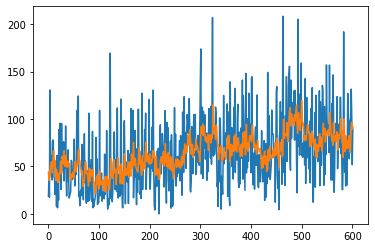

In [12]:
plt.plot(actual[:,0])
plt.plot(pred_pred[:,0])


In [13]:
print(r2_score(actual,pred_pred))
print(np.sqrt(mean_squared_error(actual,pred_pred)))
print(prediction_of_change_in_direction(actual,pred_pred))

0.14607557103675214


<IPython.core.display.Javascript object>

34.49033514839824


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

53.98671096345515


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

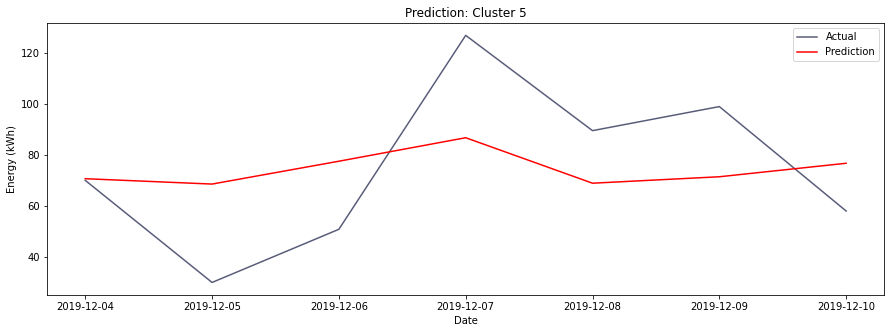

In [19]:
plt.figure(figsize=(15,5))
t = 560
cmap = plt.cm.bone
step = int((len(df["Energy (kWh)"].index))*0.8)
#plt.plot(df.index[step+t:step+t+29],actual[:,0][t:t+29], c = 'k')
plt.plot(df.index[step+t+28:step+t+30+5],actual[t+28], c = cmap(0.4), label = 'Actual')
plt.plot(df.index[step+t+28:step+t+30+5], pred_pred[t+28], c = 'r', label = 'Prediction')
plt.xlabel("Date")
plt.ylabel("Energy (kWh)")
plt.title("Prediction: Cluster 5")
plt.legend()
plt.show()

In [ ]:
'''
import matplotlib.animation as animation


fig = plt.figure()
#creating a subplot 
ax1 = fig.add_subplot(1,1,1)

def animate(step):
    ax1.clear()
    plt.plot(df.index[step:step+29],actual[:,0][step:step+29], c = 'k')
    plt.plot(df.index[step+28:step+30+7],actual[:,0][step+28:step+30+7], c = 'b', label = 'Actual')
    plt.plot(df.index[step+29:step+30+7], pred_pred[:,0][step+29:step+30+7], c = 'r', label = 'Prediction')

    ax1.set_title("Prediction: Cluster 0")
    ax1.legend()
    
ani = animation.FuncAnimation(fig, animate, interval=1000) 
ani.save('test_ARIMA_predictions.gif')
'''